# PLANEJAMENTO E ENTEDIMENTO DO NEGÓCIO

**A empresa International Bank**

    Disclaimer: O contexto a seguir é completamente fictício, a empresa, o contexto, o CEO e as perguntas de negócio existem somente na minha imaginação.

    O International Bank é um banco internacional que fornece produtos financeiros, como empréstimos, contas correntes, contas poupança, opções de investimentos, cartões de crédito e etc.

    A cada quarter do ano, os líderes se reúnem para decidir os objetivos da empresa para os próximos 3 meses. Nessa última reunião, uma das metas decididas é a criação de uma estratégia de marketing para abordar os clientes que usam cartão de crédito.

    A empresa possui um conjunto de dados sobre o comportamento de uso de aproximadamente 9000 usuários de cartão de crédito ativos, durante os últimos 6 meses e o arquivo está no nível de clientes e possui 18 variáveis comportamentais.

**O desafio**

    Você foi contratado como um cientista de dados consultor, para criar um produto de dados que cria uma segmentação de clientes que direcionará a estratégia de marketing e os resultados esperados do seu trabalho de consultoria, são os seguintes:

    - Criar uma segmentação de clientes baseado em critérios claros de seleção.
    - Tornar a segmentação de clientes acessível para o time de operações.
    - Ensinar o time de operações sobre como usar a sua solução.
    - Transferir o conhecimento para os Cientistas de Dados da International Bank.
    - Recomendar 2-3 alavancas de negócio para cada segmento de clientes.

**Roteiro**

    1 - Explore os Dados usando ferramentas e testes Estatísticos com o objetivo de encontrar inconsistências dos dados e tratar possíveis dados faltantes.
    2 - Levante Hipóteses sobre as características de um cliente Insider.
    3 - Prepare os dados para ensinar os algoritmos de Machine Learning.
    4 - Escreva vários algoritmos de Agrupamento.
    5 - Contabilize a performance do modelo de Machine Learning treinado e valide a segmentação definida.
    6 - Monte um sistema de fornecimento da segmentação na Cloud da AWS e use uma ferramenta de visualização para acessar os dados.
    7 - Crie um README sobre como interpretar e usar a sua solução.
    8 - Escreva um Relatório com as recomendações das alavancas para cada segmento.

**RFM Model**
    
    1. Recency
        a. Tempo desde a última compra.
        b. Responsividade
        
    2. Frequency
        a. Tempo médio entre as transações
        b. Engajamento
        
    3. Monetary
        a. Total gasto, faturamento
        b. "High-value Purchases"

## IOT

### Input

### Output

### Tasks

# IMPORTS

In [1]:
import inflection

import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from IPython.core.display  import HTML

from sklearn import cluster as c
from sklearn import metrics as m

pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Helper Functions

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()
    
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


# LOADING DATA 

In [3]:
data = pd.read_csv('datasets/bankmarketing.csv')

# DATA DESCRIPTION

## Rename Columns

In [4]:
data.columns = data.columns.str.lower()

## Head

In [5]:
data.head()

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,C10001,40.90,0.82,95.40,0.00,95.40,0.00,0.17,0.00,0.08,0.00,0,2,1000.00,201.80,139.51,0.00,12
1,C10002,3202.47,0.91,0.00,0.00,0.00,6442.95,0.00,0.00,0.00,0.25,4,0,7000.00,4103.03,1072.34,0.22,12
2,C10003,2495.15,1.00,773.17,773.17,0.00,0.00,1.00,1.00,0.00,0.00,0,12,7500.00,622.07,627.28,0.00,12
3,C10004,1666.67,0.64,1499.00,1499.00,0.00,205.79,0.08,0.08,0.00,0.08,1,1,7500.00,0.00,NaN,0.00,12
4,C10005,817.71,1.00,16.00,16.00,0.00,0.00,0.08,0.08,0.00,0.00,0,1,1200.00,678.33,244.79,0.00,12


## Columns

In [6]:
data.columns

Index(['cust_id', 'balance', 'balance_frequency', 'purchases',
       'oneoff_purchases', 'installments_purchases', 'cash_advance',
       'purchases_frequency', 'oneoff_purchases_frequency',
       'purchases_installments_frequency', 'cash_advance_frequency',
       'cash_advance_trx', 'purchases_trx', 'credit_limit', 'payments',
       'minimum_payments', 'prc_full_payment', 'tenure'],
      dtype='object')

## Data Dimension

In [7]:
print(f'Essa base tem {data.shape[0]} linhas e {data.shape[1]} colunas')

Essa base tem 8950 linhas e 18 colunas


## Dtypes

In [8]:
data.dtypes

cust_id                              object
balance                             float64
balance_frequency                   float64
purchases                           float64
oneoff_purchases                    float64
installments_purchases              float64
cash_advance                        float64
purchases_frequency                 float64
oneoff_purchases_frequency          float64
purchases_installments_frequency    float64
cash_advance_frequency              float64
cash_advance_trx                      int64
purchases_trx                         int64
credit_limit                        float64
payments                            float64
minimum_payments                    float64
prc_full_payment                    float64
tenure                                int64
dtype: object

## Check NA

In [9]:
data.isna().sum()

cust_id                               0
balance                               0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    313
prc_full_payment                      0
tenure                                0
dtype: int64

## Drop NA

In [10]:
data = data.dropna( subset=['minimum_payments', 'credit_limit'])

## Estatística Descritiva

In [11]:
num_attributes = data.select_dtypes(include=['int64', 'float64'])

#Central Tendecy - média e mediana
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

#Dispersion - desvio, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

#concat
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes', 'min','max','range','mean','median','std','skewness','kurtosis']
m

,attributes,min,max,range,mean,median,std,skewness,kurtosis
0,balance,0.00,19043.14,19043.14,1601.22,916.86,2095.45,2.37,7.55
1,balance_frequency,0.00,1.00,1.00,0.90,1.00,0.21,-2.08,3.37
2,purchases,0.00,49039.57,49039.57,1025.43,375.40,2166.98,8.06,108.68
3,oneoff_purchases,0.00,40761.25,40761.25,604.90,45.00,1684.21,9.94,160.12
4,installments_purchases,0.00,22500.00,22500.00,420.84,94.78,917.19,7.22,94.19
5,cash_advance,0.00,47137.21,47137.21,994.18,0.00,2121.34,5.14,52.14
6,purchases_frequency,0.00,1.00,1.00,0.50,0.50,0.40,0.03,-1.64
7,oneoff_purchases_frequency,0.00,1.00,1.00,0.21,0.08,0.30,1.50,1.06
8,purchases_installments_frequency,0.00,1.00,1.00,0.37,0.17,0.40,0.49,-1.42
9,cash_advance_frequency,0.00,1.50,1.50,0.14,0.00,0.20,1.80,3.18


1. Mínimo
    - Menor valor de um conjunto de dados.
    
    
2. Máximo
    - Maior valor de um conjunto de dados.
    
    
3. Range
    - A diferença entre o maior e menor valor de um conjunto de dados
    - Mostra a escala dos dados, mostra se precisa transformar as variáveis 
    
    
4. Média
    - A soma de todos os valores dividido pelo número de valores
    - Resume o conjunto de dados em um ponto central
    
    
5. Mediana
    - O número do meio de uma lista ordenada
    
    
6. Desvio Padrão
    - Estimativa de dispersão ou variabilidade
    - Mede a dispersão dos valores do conjunto de dados em torno de uma estimativa de localização (média)
    
    
7. Skewness
    - O quanto a distribuição está deslocada em relação a uma Gaussiana
    - Grau de assimetria da distribuição
    - Normal tem uma skewness 0
    - A distribuição normal tem simetria em relação a média, ou seja, 50% dos dados estão a esquerda e a direita
    - Skewness negativa, deslocada para esquerda
    - Skewness positiva, deslocada para direita
    
    
8. Kurtosis
    - Distribuição com um pico muito esticado
    - Fala sobre os outliers

In [12]:
#BOXPLOT

#Minimo = Q1 - 1.5 * (Q3 - Q1)
#if minimo < valor_minimo_do_conjunto_de_dados:
#    print(num_attributes['credit_limit'].min())
#else:
#    print(minimo)


#Quartil 01
#Quartil 02 = Mediana
#Quartil 03

# BARRA DE CIMA = Q3 + 1.5 * (Q3 - Q1)

# BARRA DE BAIXO


Balance: quanto eu já gastei no cartão

Cash Advance: valor do saque do limite do cartão de crédito, acumulado dos últimos 6 meses
Um adiantamento em dinheiro é basicamente um empréstimo de curto prazo oferecido pelo emissor do cartão de crédito. Quando você pega um adiantamento em dinheiro, está tomando dinheiro emprestado contra  alinha de crédito do seu cartão

Balance Frequency: frequencia de uso do cartão

Purchases: o valor gasto no cartão acumulado dos últimos 6 meses

Purchases On-off: a soma de todas as compras pagas 1x no cartão, nos ultimos 6 meses

Cash Advance: valor do saque do limite do cartão de crédito, acumulado dos últimos 6 meses.

Purchases Frequency: um valor de 0 a 1 que identifica a frequência de compra do cliente.

Cash Advance Frequency: a frequencia com que o cliente faz retiradas de dinheiro do seu cartão de crédito

Cash Advance TRX: a quantidade de saques da conta do cartão de crédito

Purchases TRX: a quantidade de compras realizadas no cartão de crédito

Credit Limit: o limite do cartão de crédito

Payments: o valor pago da fatura, não necessariamente o valor inteiro

Minimum Payments: o valor mínimo pago da fatura

Tenure: o tempo de posse do cartão em meses

# DATA FILTERING

In [13]:
df20 = data.copy()

# FEATURE ENGINEERING 

In [14]:
df30 = df20.copy()

In [26]:
#pagamento a vista ou nao
df30['one_payment'] = df30['oneoff_purchases'].apply(lambda x: 0 if x == 0.00 else 1)

# gasto médio por transação de compra
df30['avg_ticket_purchases'] = df30['purchases'] / df30['purchases_trx']

# gasto médio por transação de compra
df30['avg_ticket_expenses'] = (df30['purchases'] + df30['cash_advance']) / (df30['purchases_trx'] + df30['cash_advance'])

#soma das despesas / soma dos pagamentos
df30['debt_rate'] = ( df30['purchases'] + df30['cash_advance']) / (df30['payments'] + df30['minimum_payments'])

#percentual de uso do limite do cartão
df30['credit_limit_rate'] = df30['purchases'] / 6*(df30['credit_limit'])

# EDA 

In [27]:
df40 = df30.copy()

# DATA PREPARATION 

In [28]:
df50 = df40.copy()

In [29]:
from sklearn import preprocessing as pp

In [30]:
df50.head()

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,one_payment,avg_ticket_purchases,avg_ticket_expenses,debt_rate,credit_limit_rate
0,C10001,40.90,0.82,95.40,0.00,95.40,0.00,0.17,0.00,0.08,0.00,0,2,1000.00,201.80,139.51,0.00,12,0,47.70,47.70,0.28,15900.00
1,C10002,3202.47,0.91,0.00,0.00,0.00,6442.95,0.00,0.00,0.00,0.25,4,0,7000.00,4103.03,1072.34,0.22,12,0,NaN,1.00,1.24,0.00
2,C10003,2495.15,1.00,773.17,773.17,0.00,0.00,1.00,1.00,0.00,0.00,0,12,7500.00,622.07,627.28,0.00,12,1,64.43,64.43,0.62,966462.50
4,C10005,817.71,1.00,16.00,16.00,0.00,0.00,0.08,0.08,0.00,0.00,0,1,1200.00,678.33,244.79,0.00,12,1,16.00,16.00,0.02,3200.00
5,C10006,1809.83,1.00,1333.28,0.00,1333.28,0.00,0.67,0.00,0.58,0.00,0,8,1800.00,1400.06,2407.25,0.00,12,0,166.66,166.66,0.35,399984.00


In [18]:
# Variável Normal + sem outlier -> Standard Scaler ( x - mean / std)

# Variável Normal + com outlier -> Robust Scaler ( x - q1) / (q3 - q1)

#Variável não normal -> Min-Max Scaler (x - min) / (max - min)

mm = pp.MinMaxScaler()

df50['balance'] = mm.fit_transform( df50[['balance']] )

df50['purchases'] = mm.fit_transform( df50[['purchases']] )

df50['oneoff_purchases'] = mm.fit_transform( df50[['oneoff_purchases']] )

df50['installments_purchases'] = mm.fit_transform( df50[['installments_purchases']] )

df50['cash_advance'] = mm.fit_transform( df50[['cash_advance']] )

df50['cash_advance_trx'] = mm.fit_transform( df50[['cash_advance_trx']] )

df50['purchases_trx'] = mm.fit_transform( df50[['purchases_trx']] )

df50['credit_limit'] = mm.fit_transform( df50[['credit_limit']] )

df50['payments'] = mm.fit_transform( df50[['payments']] )

df50['minimum_payments'] = mm.fit_transform( df50[['minimum_payments']] )

df50['tenure'] = mm.fit_transform( df50[['tenure']] )




# FEATURE SELECTION 

In [21]:
cols_drop = ['cust_id']
X = df50.drop( columns=cols_drop )

# HYPERPARAMETER FINE TUNNING 

## K-Means

In [22]:
from sklearn import cluster as c
from sklearn import metrics as m

clusters = [2, 3, 4, 5, 6, 7, 8]

silhouette_list = []
davies_list = []
for k in clusters:
    #model definition
    kmeans_model = c.KMeans( n_clusters=k )
    
    #model training
    kmeans_model.fit( X )
    
    #model predict
    labels = kmeans_model.predict( X )
    
    #model performance
    sil = m.silhouette_score( X, labels)
    dav = m.davies_bouldin_score( X, labels)
    silhouette_list.append(sil)
    davies_list.append(dav)
    

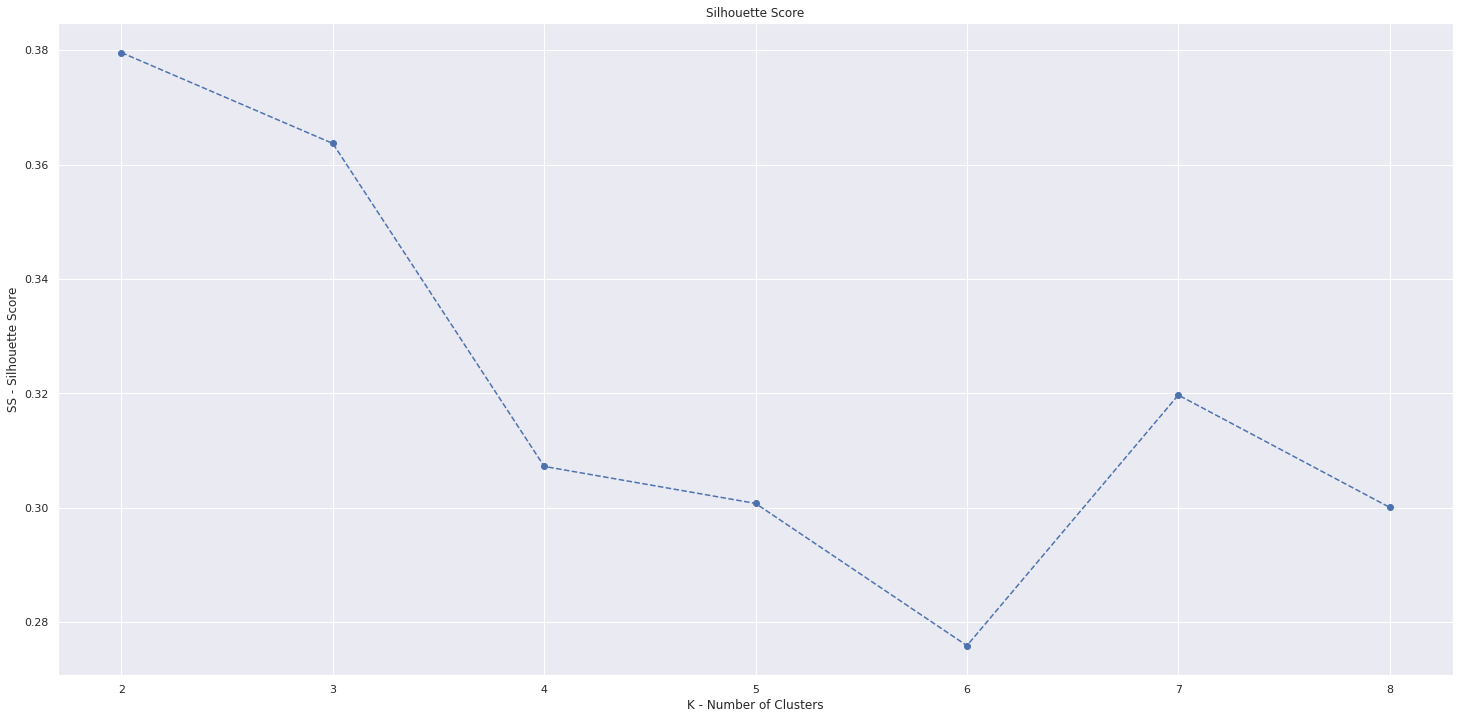

In [23]:
plt.plot( clusters, silhouette_list, linestyle='--', marker='o', color='b')
plt.xlabel( 'K - Number of Clusters' )
plt.ylabel( 'SS - Silhouette Score')
plt.title( 'Silhouette Score');

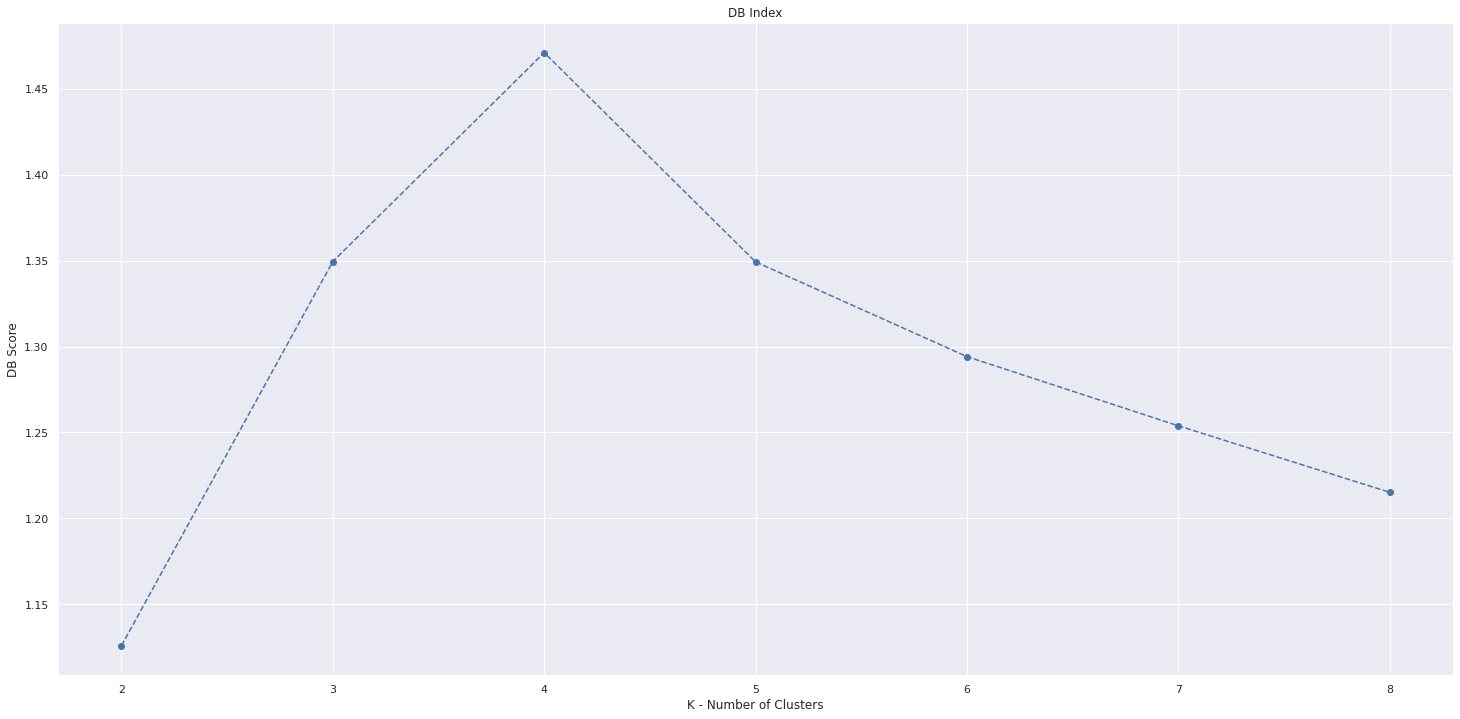

In [24]:
plt.plot( clusters, davies_list, linestyle='--', marker='o', color='b')
plt.xlabel( 'K - Number of Clusters' )
plt.ylabel( 'DB Score')
plt.title( 'DB Index');

# MACHINE LEARNING

# CLUSTERING ANALYSIS

# EDA - INSIGHT REPORTS

# DEPLOY TO PRODUCTION